In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history
from nets.cnn_net import cnn_net

Using TensorFlow backend.


In [2]:
train_path = 'res_still/train'
valid_path = 'res_still/valid'
test_path = 'res_still/test'

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35))

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 355 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [3]:
model = cnn_net()

In [4]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=355 // batch_size,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=100 // batch_size)

Epoch 1/10
11/11 [==============================] - 5s 445ms/step - loss: 3.5781 - acc: 0.4282 - val_loss: 1.0659 - val_acc: 0.4062
Epoch 2/10
11/11 [==============================] - 4s 390ms/step - loss: 1.0627 - acc: 0.4402 - val_loss: 0.9993 - val_acc: 0.6912
Epoch 3/10
11/11 [==============================] - 4s 362ms/step - loss: 0.9914 - acc: 0.5798 - val_loss: 0.7319 - val_acc: 0.7353
Epoch 4/10
11/11 [==============================] - 3s 309ms/step - loss: 0.6756 - acc: 0.7716 - val_loss: 0.4072 - val_acc: 0.8088
Epoch 5/10
11/11 [==============================] - 4s 344ms/step - loss: 0.5470 - acc: 0.7968 - val_loss: 0.2921 - val_acc: 0.9479
Epoch 6/10
11/11 [==============================] - 4s 403ms/step - loss: 0.3373 - acc: 0.8884 - val_loss: 0.2288 - val_acc: 0.9118
Epoch 7/10
11/11 [==============================] - 3s 313ms/step - loss: 0.2810 - acc: 0.8998 - val_loss: 0.1745 - val_acc: 0.9706
Epoch 8/10
11/11 [==============================] - 4s 345ms/step - loss: 0.

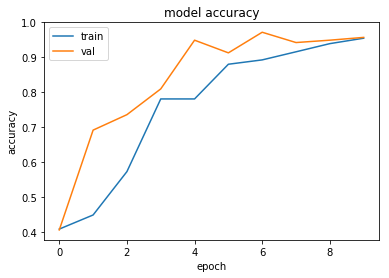

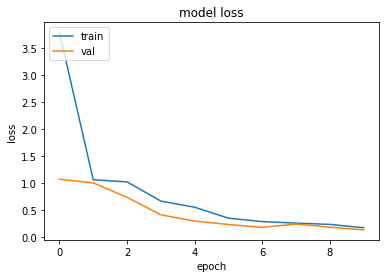

In [5]:
plot_history(history)